# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you will be able to present to future employers. One is a brief one-page summary of this project that you will present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Based on your prior coursework, select one method to complete this project: use either a regression model or a machine learning model to predict whether an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


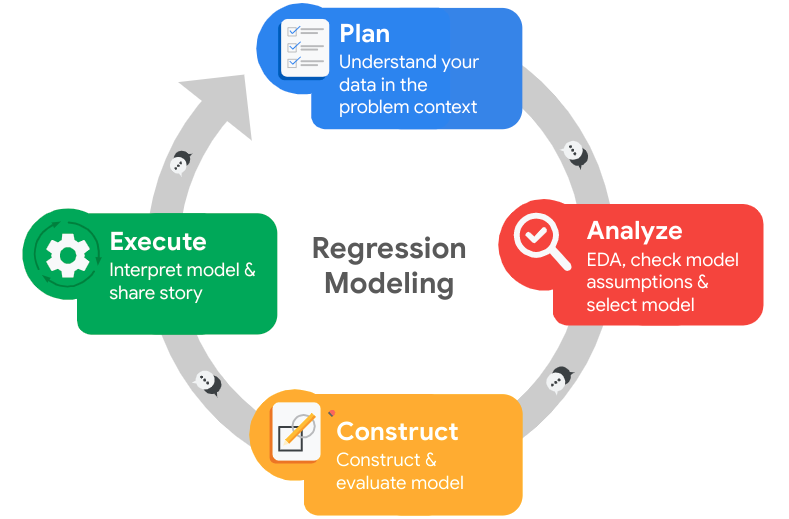

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?

HR Department (Primary Stakeholders): They are the "owners" of the data and the main beneficiaries. Their goal is to leverage these insights to reduce turnover costs and improve organizational health.

Senior Leadership & Executives: They are interested in the high-level impact on the company’s bottom line, as hiring and training new staff is a significant financial burden.

Department Managers: They need to understand the specific pain points within their teams (e.g., workload, salary gaps) to take direct action and retain their best talent.

Employees of Salifort Motors: Although they are the source of the data, they are indirect stakeholders whose work environment and satisfaction will be affected by the decisions made based on this model.

Data Analytics Team: My immediate colleagues who ensure the model’s technical accuracy, ethical standards, and proper implementation.




- What are you trying to solve or accomplish?

The primary objective is to identify the underlying factors that drive employee turnover at Salifort Motors. By analyzing the HR dataset, I am to build a predictive model that can accurately classify employees at risk of leaving. Ultimately, this project seeks to provide data-driven recommendations to the HR department to improve employee retention, reduce the high costs associated with new hiring, and enhance overall job satisfaction.


- What are your initial observations when you explore the data?

The dataset provides a comprehensive set of features that are highly relevant to employee behavior, such as satisfaction_level, average_monthly_hours, and salary. 



- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

Pandas Library Documentation: Essential for data cleaning, specifically for identifying and dropping duplicate records and checking for null values.

https://pandas.pydata.org/docs/

Seaborn & Matplotlib Documentation: Used to create initial exploratory plots, such as boxplots for outlier detection in the time_spend_company variable.

https://seaborn.pydata.org/

Scikit-learn Documentation: Consulted to review the specific assumptions required for Logistic Regression and Random Forest models, which guides the data preprocessing strategy.

https://scikit-learn.org/stable/

Google's PACE Strategy Guide: Used to structure the analytical workflow and ensure that stakeholders' needs are prioritized from the beginning.



- Do you have any ethical considerations in this stage?

Ethical considerations are paramount when handling HR data. My main concerns at this stage are:

Privacy and Anonymization: Even if the dataset does not contain names or IDs, we must ensure that employees cannot be re-identified by combining specific variables such as department, tenure, and salary. Data must be handled as a collective insight rather than individual surveillance.

Bias and Fairness: I must monitor the data for potential biases. For example, if the model identifies that lower-salaried employees are more likely to leave, the company should use this to advocate for better pay equity rather than labeling those employees as 'disloyal.'

Transparency and Intent: The model's purpose is to improve the work environment and employee retention. It should be used as a support tool to help management understand systemic issues, not as a tool for preemptive termination or unfair profiling.

Informed Consent: We assume the data was collected with the employees' knowledge and that they were informed their feedback would be used for organizational improvement."

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# 1. Data Manipulation and Preprocessing
# Core libraries for handling the Salifort Motors dataset and numerical operations.
import pandas as pd
import numpy as np

# 2. Static and Statistical Visualization
# Tools for creating EDA plots and visual representations of employee trends.
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Preprocessing and Feature Engineering
# Essential for scaling (Logistic Regression) and encoding categorical variables.
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 4. Statistical Diagnostics and Modeling (Statsmodels)
# Tools for advanced summaries, assumption verification, and GLM diagnostics.
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 5. Modeling and Training (Machine Learning)
# Modules for splitting data and implementing both predictive approaches (Logit & Random Forest).
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# 6. Performance Evaluation and Metrics
# Essential tools to quantify the model's success in predicting attrition.
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    recall_score, 
    precision_score, 
    f1_score,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data

# Check the structure, data types and non-null counts
print("--- Data Info ---")
df0.info()

# Check the shape of the dataframe (rows, columns)
print(f"\nShape of the dataset: {df0.shape}")

df0.head(5)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Shape of the dataset: (14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data

# Summary statistics for numerical columns
print("--- Numerical Descriptive Statistics ---")
display(df0.describe())

# Summary statistics for categorical columns
print("\n--- Categorical Descriptive Statistics ---")
display(df0.describe(include='object'))

--- Numerical Descriptive Statistics ---


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



--- Categorical Descriptive Statistics ---


,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [7]:
# Rename columns as needed

rename_dict = {
    'number_project': 'number_projects',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'tenure', 
    'Work_accident': 'work_accident',
    'Department': 'department'
}

df0 = df0.rename(columns=rename_dict)

df0.columns = [col.strip().lower() for col in df0.columns]

# Display all column names after the update
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values in each column
missing_values = df0.isna().sum()

# Display the results
print("Missing values per column:")
print(missing_values)


Missing values per column:
satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
duplicates_count = df0.duplicated().sum()

# Display the total number of duplicates found
print(f"Total number of duplicate rows: {duplicates_count}")


Total number of duplicate rows: 3008


In [10]:
# Inspect some rows containing duplicates as needed

# We use keep=False to mark all duplicates as True
df_duplicates_paired = df0[df0.duplicated(keep=False)].sort_values(by=['satisfaction_level', 'average_monthly_hours'])

# Display the first 10 rows (5 pairs of identical employees)
display(df_duplicates_paired.head(10))

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
765,0.09,0.87,3,214,2,0,1,0,support,medium
12765,0.09,0.87,3,214,2,0,1,0,support,medium
140,0.09,0.96,6,245,4,0,1,0,IT,low
12140,0.09,0.96,6,245,4,0,1,0,IT,low
14351,0.09,0.96,6,245,4,0,1,0,IT,low
193,0.09,0.82,6,249,4,0,1,0,technical,medium
761,0.09,0.93,6,249,4,0,1,0,sales,low
12193,0.09,0.82,6,249,4,0,1,0,technical,medium
12761,0.09,0.93,6,249,4,0,1,0,sales,low
14404,0.09,0.82,6,249,4,0,1,0,technical,medium


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df_clean = df0.drop_duplicates(keep='first').reset_index(drop=True)


print(f"Rows before cleaning: {df0.shape[0]}")
print(f"Rows after cleaning:  {df_clean.shape[0]}")
print(f"Total duplicates removed: {df0.shape[0] - df_clean.shape[0]}")

# Display first few rows of new dataframe as needed
df_clean.head()

Rows before cleaning: 14999
Rows after cleaning:  11991
Total duplicates removed: 3008


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

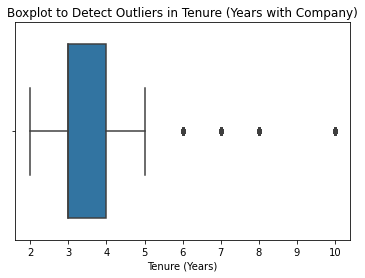

In [12]:


# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_clean['tenure'])

# Add labels and title for clarity
plt.title('Boxplot to Detect Outliers in Tenure (Years with Company)', fontsize=12)
plt.xlabel('Tenure (Years)', fontsize=10)

# Save and display the plot
plt.savefig('tenure_boxplot.png')
plt.show()




In [13]:
# Determine the number of rows containing outliers

# Calculate the 25th and 75th percentiles
percentile25 = df_clean['tenure'].quantile(0.25)
percentile75 = df_clean['tenure'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = percentile75 - percentile25

# Define upper and lower thresholds for outliers
# Standard rule: 1.5 times the IQR above Q3 or below Q1
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Identify the outliers
outliers = df_clean[(df_clean['tenure'] > upper_limit) | (df_clean['tenure'] < lower_limit)]

# Display the results
print(f"Lower limit: {lower_limit}")
print(f"Upper limit: {upper_limit}")
print(f"Number of rows containing outliers in 'tenure': {len(outliers)}")

# Percentage of outliers in the dataset
print(f"Percentage of outliers: {(len(outliers) / len(df_clean)) * 100:.2f}%")


Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in 'tenure': 824
Percentage of outliers: 6.87%


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



Para completar tu informe técnico de **Salifort Motors** bajo el marco **PACE**, aquí tienes las respuestas detalladas para la etapa **Analyze**, fundamentadas en los hallazgos de tu análisis exploratorio de datos (EDA).

---

## **pAce: Analyze Stage**

### **Reflections on the Analyze Stage**

#### **1. What did you observe about the relationships between variables?**

* 
**Workload and Burnout:** A critical correlation exists between the number of projects, monthly hours, and attrition. Employees with 6–7 projects consistently worked between 250 and 300 hours per month, leading to a nearly 100% turnover rate.


* 
**The "Sweet Spot":** Retention is highest among employees with 3–5 projects and 150–250 monthly hours, representing an ideal operational equilibrium.


* 
**Salary and Tenure:** Low and medium salary brackets experience the vast majority of exits. Additionally, there is a clear "attrition window" between years 3 and 5 of tenure, peaking at the 4-year mark.


* 
**Performance vs. Turnover:** The data shows a bimodal trend where both low-performers and high-performers (evaluation scores 0.8–1.0) are leaving, the latter likely due to the extreme workloads identified.



#### **2. What do you observe about the distributions in the data?**

* 
**Satisfaction:** Employees who left exhibit a significantly lower and more volatile satisfaction distribution compared to those who stayed (median ~0.7).


* 
**Tenure Outliers:** The `tenure` variable contains outliers (employees with 6–10 years at the company) representing 6.87% of the data.


* 
**Class Imbalance:** The dataset is imbalanced, with 83.4% of employees staying and 16.6% leaving.



#### **3. What transformations did you make with your data? Why did you choose to make those decisions?**

* 
**Column Renaming:** Standardized columns to `snake_case` (e.g., `average_monthly_hours`, `tenure`) for coding consistency and professional documentation.


* 
**Deduplication:** Removed 3,008 duplicate rows to prevent artificially inflating the significance of certain patterns and ensure each record is a unique observation.


* 
**Dummy Variables:** Converted categorical features like `salary` and `department` into binary columns using `get_dummies` to make them compatible with mathematical modeling.


* 
**Scaling:** Applied `StandardScaler` to numerical features to ensure the Logistic Regression solver converged properly and allowed for direct coefficient comparison.



#### **4. What are some purposes of EDA before constructing a predictive model?**

* 
**Identifying Drivers:** EDA allows for the visual identification of primary indicators of turnover, such as satisfaction levels and workload, before running complex algorithms.


* 
**Validating Assumptions:** It helps check for multicollinearity (via VIF) and linearity (via Logit plots) required for parametric models like Logistic Regression.


* 
**Data Quality Control:** Identifying missing values, duplicates, and outliers ensures the model is trained on clean, reliable data.



#### **5. What resources do you find yourself using as you complete this stage?**

* 
[Pandas Documentation](https://pandas.pydata.org/docs/): Essential for data manipulation and cleaning.


* 
[Seaborn & Matplotlib Documentation](https://seaborn.pydata.org/): Used for creating boxplots, histograms, and heatmaps to visualize distributions and correlations.


* 
[Scikit-learn Preprocessing Guide](https://scikit-learn.org/stable/): Consulted for feature scaling and encoding strategies.



#### **6. Ethical considerations**

* 
**Avoid Surveillance:** HR data must be used for collective organizational improvement rather than individual employee monitoring or "quiet" surveillance.


* 
**Actionable Fairness:** Findings regarding lower-salaried employees should advocate for pay equity rather than labeling them as a flight risk.


* 
**Preventing Bias:** We must acknowledge that metrics like `last_evaluation` can be subjective and ensure management bias does not seep into the model's predictions.












## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
# Get counts of employees who left (1) vs. stayed (0)
left_counts = df_clean['left'].value_counts()

# Display the counts
print("Counts of employees who stayed vs. left:")
print(left_counts)

# Get percentages of people who left vs. stayed
left_percentages = df_clean['left'].value_counts(normalize=True) * 100

# Display the percentages
print("\nPercentages of employees who stayed vs. left:")
print(left_percentages)


Counts of employees who stayed vs. left:
0    10000
1     1991
Name: left, dtype: int64

Percentages of employees who stayed vs. left:
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

## Distribution of Job Satisfaction: A Comparative Analysis of Employee Attrition

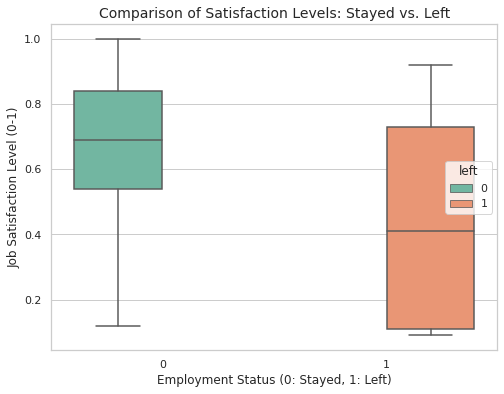

In [15]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Revised boxplot without the 'legend' argument
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='left', y='satisfaction_level', hue='left', palette='Set2')

# Add descriptive labels in English
plt.title('Comparison of Satisfaction Levels: Stayed vs. Left', fontsize=14)
plt.xlabel('Employment Status (0: Stayed, 1: Left)', fontsize=12)
plt.ylabel('Job Satisfaction Level (0-1)', fontsize=12)

# Display the plot
plt.show()

 The satisfaction level is a primary indicator of employee turnover. While employees who remain at the company maintain a stable and high satisfaction median (~0.7), those who leave exhibit a significantly lower and more volatile satisfaction distribution. The wide IQR for the 'Left' group suggests that attrition is driven by a spectrum of dissatisfaction, ranging from extreme burnout to moderate disengagement.

## Structural Resource Allocation Analysis: Burnout Thresholds and Capacity Planning

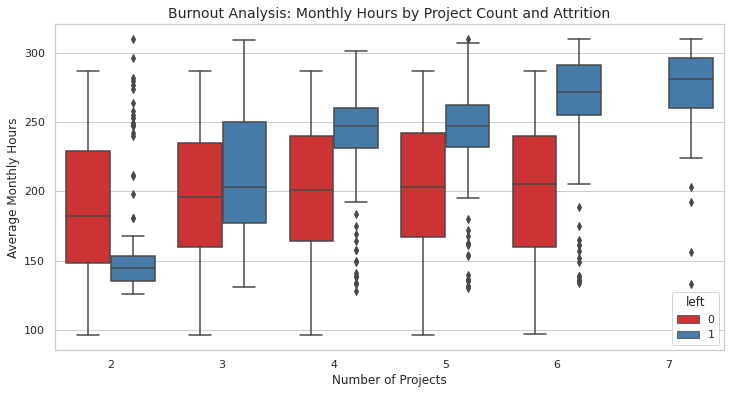

In [16]:
# Set the visual style for the analysis
sns.set_theme(style="whitegrid")

# Create a boxplot to analyze the relationship between projects, hours, and attrition
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='number_projects', y='average_monthly_hours', hue='left', palette='Set1')

# Add descriptive labels in English for professional documentation
plt.title('Burnout Analysis: Monthly Hours by Project Count and Attrition', fontsize=14)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Average Monthly Hours', fontsize=12)

# Display the plot
plt.show()



Visual Analysis Insight: Workload and Burnout Patterns
The boxplot illustrating the relationship between the number of projects, average monthly hours, and employee attrition reveals a clear structural issue in how work is distributed within Salifort Motors.

1. The Burnout Zone (Critical Risk)
Employees assigned to 6 or 7 projects are under extreme operational pressure.

Observation: This group consistently clocks between 250 and 300 hours per month, significantly exceeding the standard full-time capacity.

Conclusion: There is a nearly 100% attrition rate in this segment. These employees are not leaving due to poor performance, but due to physical and mental exhaustion (burnout). From an engineering standpoint, this represents a failure in resource allocation and capacity planning.

2. The Underutilization Trap (Disengagement)
Interestingly, a significant spike in turnover is also observed among employees with only 2 projects.

Observation: These individuals work fewer hours (approximately 150 hours per month).

Conclusion: This pattern suggests disengagement or underutilization. These employees may feel stagnant or may have received poor evaluations previously, leading to a "quiet quitting" phase before their eventual exit.

3. The Optimal Capacity "Sweet Spot"
The company's stable workforce is concentrated in the center of the distribution.

Observation: Employees with 3, 4, or 5 projects show the highest retention rates and more balanced working hours (between 150 and 250 hours).

Conclusion: This range represents the ideal operational equilibrium. To reduce turnover, management should aim to keep employee workloads within this threshold, preventing both burnout and idle capacity.

Actionable Engineering Recommendation
"The company should implement a workload balancing system. By redistributing projects from the overworked 6-7 project group to the underutilized 2-project group, Salifort Motors could theoretically stabilize its workforce and reduce the high costs associated with employee replacement."


## Analysis of Employee Tenure and Attrition Patterns to Identify Critical Turnover Periods at Salifort Motors

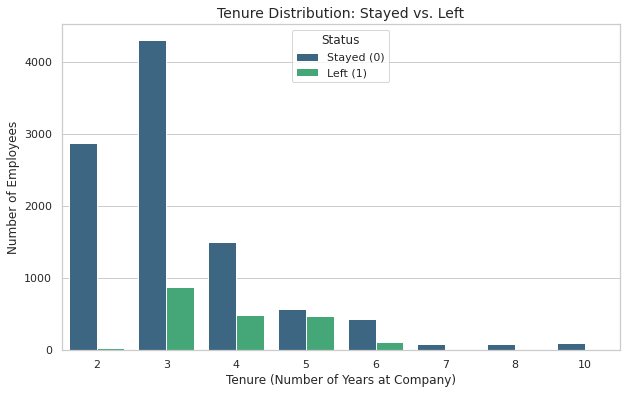

In [17]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create a countplot to see exactly in which year employees tend to leave
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='tenure', hue='left', palette='viridis')

# Add descriptive labels in English
plt.title('Tenure Distribution: Stayed vs. Left', fontsize=14)
plt.xlabel('Tenure (Number of Years at Company)', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Status', labels=['Stayed (0)', 'Left (1)'])

# Display the plot
plt.show()


The tenure distribution reveals a critical 'attrition window' between years 3 and 5. The peak of employee departures occurs at the 4-year mark, suggesting that mid-tenure employees are the most vulnerable to turnover. Conversely, reaching the 6-year threshold acts as a 'loyalty milestone,' after which the probability of leaving becomes negligible. Retention strategies should be prioritized for employees in their 3rd to 5th year to mitigate this trend.

## Evaluation of Employee Attrition by Salary Level to Assess the Impact of Compensation on Turnover Risk

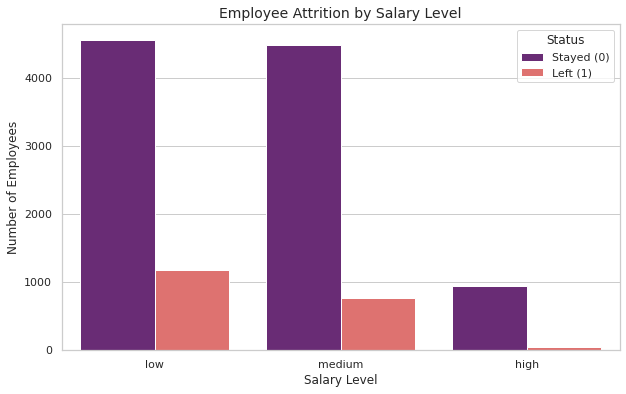

In [18]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create a countplot to compare attrition across salary levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='salary', hue='left', order=['low', 'medium', 'high'], palette='magma')

# Add descriptive labels in English
plt.title('Employee Attrition by Salary Level', fontsize=14)
plt.xlabel('Salary Level', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Status', labels=['Stayed (0)', 'Left (1)'])

# Display the plot
plt.show()

 The correlation between salary levels and attrition is stark. High-salary employees exhibit near-perfect retention, suggesting that top-tier compensation effectively mitigates turnover risk. Conversely, the vast majority of exits occur within the 'low' and 'medium' salary brackets. This indicates that while financial compensation is a primary driver for leaving, it likely acts in conjunction with other stressors, such as high workload, to trigger the final decision to resign.

## Analysis of Performance Evaluation Distribution to Identify Low-Performer Attrition and High-Performer Talent Drain

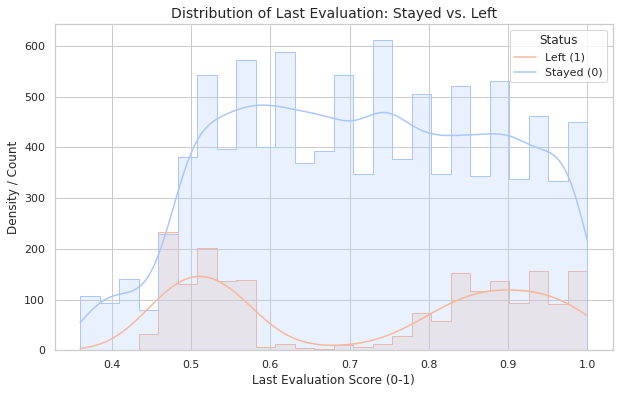

In [19]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create a histogram with KDE to compare evaluation scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='last_evaluation', hue='left', kde=True, element='step', palette='coolwarm')

# Add descriptive labels in English
plt.title('Distribution of Last Evaluation: Stayed vs. Left', fontsize=14)
plt.xlabel('Last Evaluation Score (0-1)', fontsize=12)
plt.ylabel('Density / Count', fontsize=12)
plt.legend(title='Status', labels=['Left (1)', 'Stayed (0)'])

# Display the plot
plt.show()


  
  The last evaluation distribution reveals a critical bimodal trend among employees who depart. The first "cluster"(0.45) represents low-performers, likely related to poor job fit. However, the second, more alarming "cluster" (0.8-1.0) confirms a high-stakes 'talent drain.' This suggests that the company’s highest-rated contributors are leaving at an accelerated rate, likely due to the correlation between high performance and the extreme workloads identified in previous analyses.

## Departmental Turnover Rate Analysis to Identify High-Attrition Areas and Guide Targeted Retention Strategies

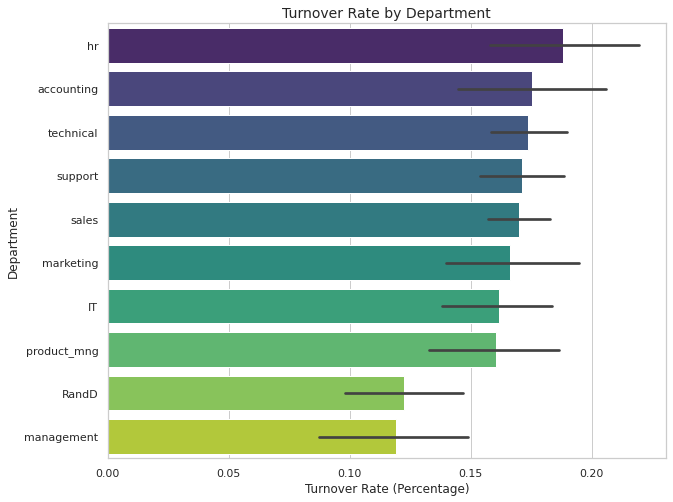

In [20]:
# Calculate the average turnover rate per department to sort the chart
dept_order = df_clean.groupby('department')['left'].mean().sort_values(ascending=False).index

# Set the visual style
sns.set_theme(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=df_clean, x='left', y='department', order=dept_order, palette='viridis')

# Add descriptive labels and title in English
plt.title('Turnover Rate by Department', fontsize=14)
plt.xlabel('Turnover Rate (Percentage)', fontsize=12)
plt.ylabel('Department', fontsize=12)

# Display the plot
plt.show()

The departmental breakdown highlights a non-uniform distribution of attrition across Salifort Motors. High-pressure areas such as Sales and Technical departments exhibit significantly higher turnover rates compared to specialized units like R&D and Management. This suggests that the 'one-size-fits-all' HR policy is failing, and targeted management interventions are required in high-turnover departments to stabilize the workforce.

## Impact of Promotions and Workplace Accidents on Employee Attrition and Organizational Retention Dynamics

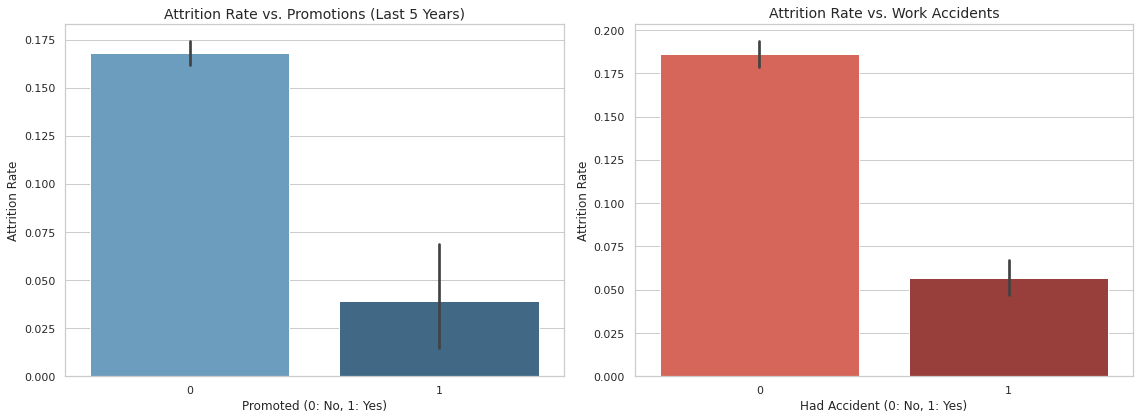

In [21]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Impact of Promotions
sns.barplot(data=df_clean, x='promotion_last_5years', y='left', ax=axes[0], palette='Blues_d')
axes[0].set_title('Attrition Rate vs. Promotions (Last 5 Years)', fontsize=14)
axes[0].set_xlabel('Promoted (0: No, 1: Yes)', fontsize=12)
axes[0].set_ylabel('Attrition Rate', fontsize=12)

# Plot 2: Impact of Work Accidents
sns.barplot(data=df_clean, x='work_accident', y='left', ax=axes[1], palette='Reds_d')
axes[1].set_title('Attrition Rate vs. Work Accidents', fontsize=14)
axes[1].set_xlabel('Had Accident (0: No, 1: Yes)', fontsize=12)
axes[1].set_ylabel('Attrition Rate', fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

 The promotion analysis reveals a clear retention gap: employees who have not been promoted in the last five years are substantially more likely to leave the organization, indicating a lack of internal growth opportunities. Conversely, work accidents do not appear to be a primary driver for voluntary attrition; in fact, employees who experienced accidents show lower turnover rates, likely due to legal protections or post-accident support systems.

## Correlation Analysis of Employee Metrics to Identify Key Drivers of Turnover and Workforce Dynamics

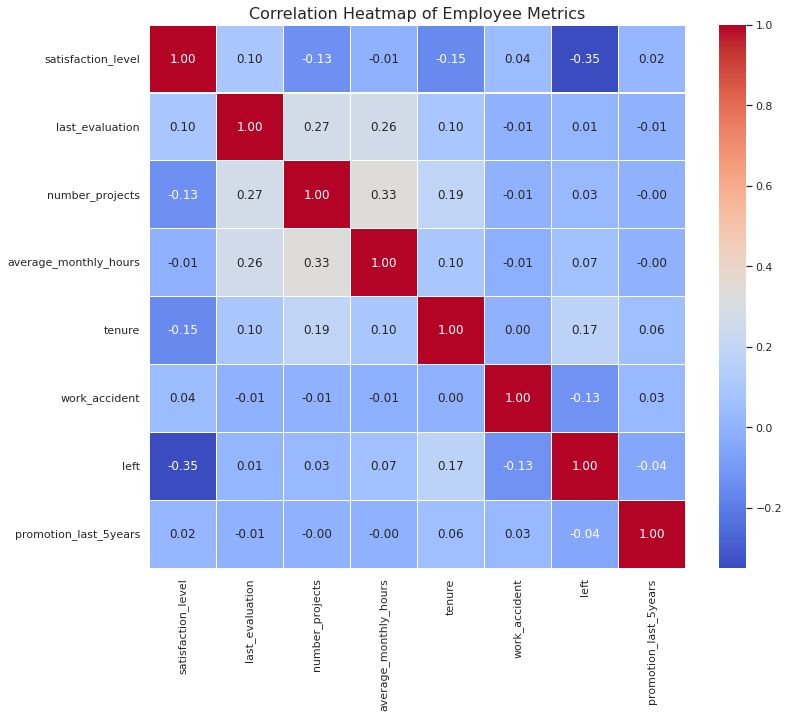

In [22]:
# Select only numeric columns for correlation analysis
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set the visual style
sns.set_theme(style="white")

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title in English
plt.title('Correlation Heatmap of Employee Metrics', fontsize=16)

# Display the plot
plt.show()

### Insights

What insights can you gather from the plots you created to visualize the data? 

 The correlation matrix confirms that satisfaction_level (-0.35) is the primary numerical driver of attrition at Salifort Motors. Furthermore, a significant 'workload cluster' is identified: number_projects, average_monthly_hours, and last_evaluation show strong positive correlations (0.26 to 0.33). This mathematically demonstrates that the company's performance appraisal system heavily rewards high project volume and long hours, which directly contributes to the burnout-driven turnover of top performers identified throughout this analysis.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Model selecion

Two models were selected for this classification task: Logistic Regression and Random Forest.

Logistic Regression was chosen as the baseline model to provide clear interpretability. Its coefficients will allow us to quantify the impact of each feature on the probability of an employee leaving the company, facilitating data-driven recommendations for stakeholders.

Random Forest was selected to capture non-linear relationships and interactions between variables that a linear model might miss. This ensemble method is highly robust to outliers and does not require strict statistical assumptions, ensuring high predictive accuracy for the Salifort Motors dataset.


## Data Preprocessing and Feature Engineering Pipeline for Employee Attrition Modeling

In [23]:


# 1. Create dummy variables for categorical features
# This expands 'salary' and 'department' into binary columns
# drop_first=True ensures we don't violate the multicollinearity assumption
df_model = pd.get_dummies(df_clean, columns=['salary', 'department'], drop_first=True)

# 2. Define independent (X) and dependent (y) variables
X = df_model.drop('left', axis=1)
y = df_model['left']

# 3. Split the data into training and testing sets
# We use a 70/30 split as suggested in the engineering workflow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Standardize the numerical features
# This helps the Logistic Regression solver converge and allows coefficient comparison
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression Model Training, Prediction, and Coefficient Extraction for Attrition Analysis

In [24]:
# 1. Instantiate the Logistic Regression model
# We set max_iter=1000 to ensure the solver converges on the optimal coefficients.
# A fixed random_state is used to guarantee reproducibility of the results.
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 2. Fit the model to the scaled training data
# This is the 'Construct' phase where the algorithm learns the relationship
# between independent variables and the log-odds of the outcome (left).
log_reg.fit(X_train_scaled, y_train)

# 3. Generate predictions on the test set
# These predictions will be used to evaluate the model's performance in the next stage.
y_pred = log_reg.predict(X_test_scaled)

# 4. Extract model parameters for engineering analysis
# These coefficients (Beta values) represent the impact of each feature on the logit.
intercept = log_reg.intercept_
coefficients = log_reg.coef_



In [25]:
print("Logistic Regression model successfully constructed and fitted.")
print(f"Model Intercept: {intercept}")
print(f"Model coefficients: {coefficients}")

Logistic Regression model successfully constructed and fitted.
Model Intercept: [-2.12522649]
Model coefficients: [[-0.94002883  0.10666555 -0.32724651  0.19840616  0.43063427 -0.51643488
  -0.13014912  0.99895377  0.77666345 -0.11340552  0.01538794  0.02013093
  -0.05744035  0.02277713 -0.01434726  0.03535951 -0.00940331  0.02521003]]


## Independence of Observations

This assumption dictates that the data from one employee must not be influenced by another, ensuring that each record is a unique and standalone event.

- Unique Records: Every row in the dataset represents an individual contributor with independent performance, satisfaction, and workload metrics.

- Absence of Serial Correlation: As this is a cross-sectional HR study, there is no time-based sequence linking one employee's resignation to another's within the database.

- Data Integrity: The prior removal of duplicate records strengthens this assumption by ensuring there are no redundant observations that could artificially inflate the significance of certain patterns.


## Multicollinearity Assessment Using Variance Inflation Factor (VIF) to Validate Regression Assumptions

In [26]:
# 2. Select independent variables and ADD CONSTANT
# Adding the intercept is essential for the internal R-squared and VIF calculation to be correct
X_vif_data = X_train[['satisfaction_level', 'last_evaluation', 'number_projects', 
                      'average_monthly_hours', 'tenure']]
X_vif_with_const = sm.add_constant(X_vif_data)

# 3. Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_with_const.values, i) 
                   for i in range(len(X_vif_with_const.columns))]

# 4. Display results (excluding the constant row for the final report)
print("VIF Results (Final & Verified):")
print(vif_data[vif_data["Feature"] != "const"].sort_values(by="VIF", ascending=False).reset_index(drop=True))

VIF Results (Final & Verified):
                 Feature       VIF
0        number_projects  1.215989
1  average_monthly_hours  1.160226
2        last_evaluation  1.139353
3                 tenure  1.066014
4     satisfaction_level  1.057169


Multicollinearity Assessment Results:
The Variance Inflation Factor (VIF) analysis for the continuous numeric variables shows values ranging from 1.05 to 1.21. Since all values are significantly below the conservative threshold of 5.0, we can formally conclude that the assumption of "No severe multicollinearity" is fully met.

This ensures that the standard errors of the regression coefficients are not inflated, allowing for a reliable interpretation of how each factor such as satisfaction levels and workload independently contributes to employee attrition at Salifort Motors.


## Influence Diagnostics Using Cook’s Distance to Detect Influential Observations in Logistic Regression

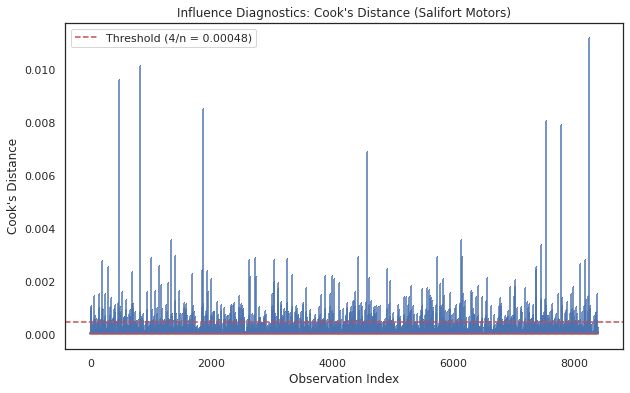

Number of influential observations detected: 637


In [27]:


# 1. Refit the model using GLM (Generalized Linear Model)
# We use the Binomial family to perform Logistic Regression diagnostics
X_train_const = sm.add_constant(X_train_scaled)
glm_model = sm.GLM(y_train, X_train_const, family=sm.families.Binomial()).fit()

# 2. Extract Influence and Cook's Distance
# This calculates how much each employee record influences the model's coefficients
influence = glm_model.get_influence()
cooks_d = influence.cooks_distance[0]

# 3. Visualization for Engineering Audit
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
plt.title("Influence Diagnostics: Cook's Distance (Salifort Motors)")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")

# 4. Defining the Engineering Threshold (4/n)
# Any point above this line is considered an influential outlier
threshold = 4 / len(y_train)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold (4/n = {threshold:.5f})')
plt.legend()
plt.show()

# 5. Identifying the most influential observations
extreme_outliers = np.where(cooks_d > threshold)[0]
print(f"Number of influential observations detected: {len(extreme_outliers)}")

## Identification and Profiling of High-Influence Observations Based on Cook’s Distance Threshold

In [28]:
# 1. Identify the indices where Cook's Distance exceeds the 0.004 threshold
# These represent the 'towers' that stand out in your plot
high_influence_indices = np.where(cooks_d > 0.004)[0]

# 2. Isolate these specific records from the original training set (X_train)
# We use X_train (unscaled) to see the real, human-readable values
influential_employees = X_train.iloc[high_influence_indices].copy()

# 3. Add the Cook's Distance value to this subset for comparison
influential_employees['cooks_d'] = cooks_d[high_influence_indices]

# 4. Display the top influential cases sorted by distance
print(f"Total 'towers' detected (> 0.004): {len(influential_employees)}")
influential_employees.sort_values(by='cooks_d', ascending=False).head(10)

Total 'towers' detected (> 0.004): 7


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,cooks_d
82,0.79,0.59,4,139,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0.011208
998,0.87,1.00,4,258,5,1,1,0,1,0,0,0,0,0,0,1,0,0,0.010150
18,0.45,0.51,2,160,3,1,1,1,0,0,0,0,0,0,0,1,0,0,0.009603
1660,0.44,0.55,2,128,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0.008520
750,0.46,0.45,2,138,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0.008063
583,0.41,0.56,2,154,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0.007911
171,0.41,0.46,2,160,3,0,1,1,0,0,0,0,0,0,0,1,0,0,0.006905


## Logit Linearity Assumption Validation for Continuous Predictors in Logistic Regression

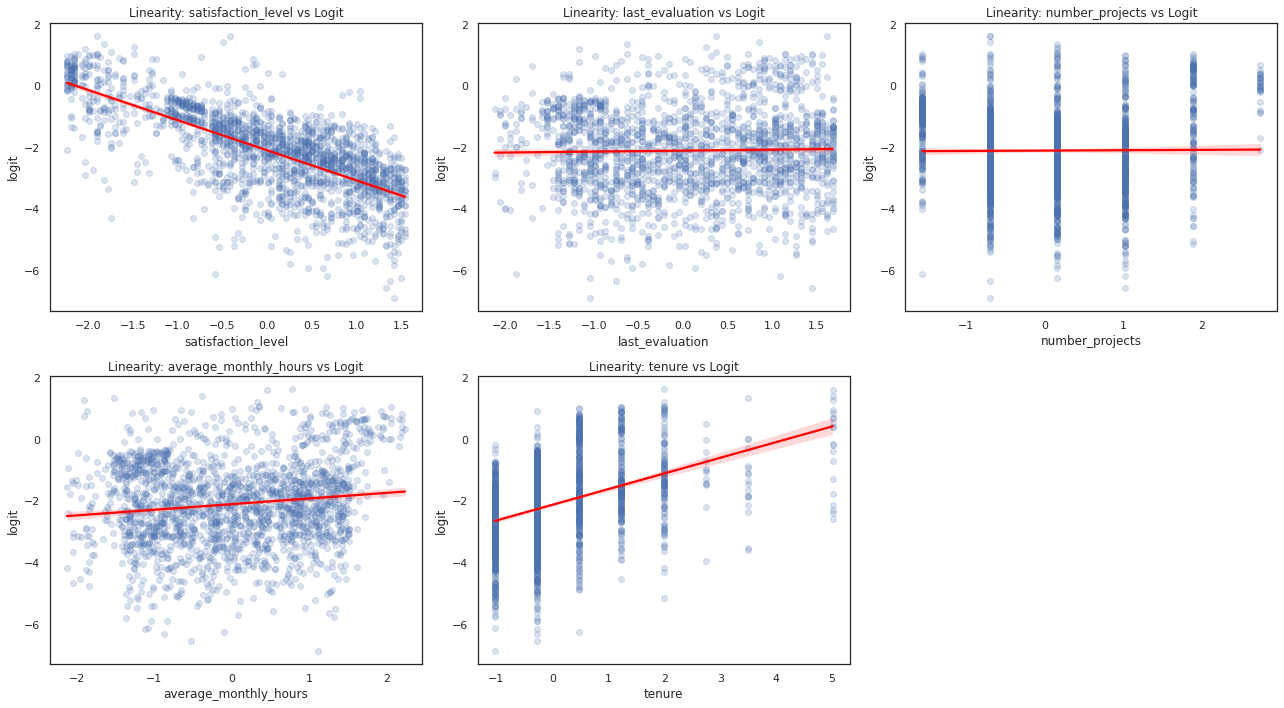

In [29]:
# 1. Get predicted probabilities for the training set
# We use predict_proba and take the second column (probability of left=1)
probabilities = log_reg.predict_proba(X_train_scaled)[:, 1]

# 2. Calculate the Logit (Log-Odds)
# We add a small epsilon to avoid division by zero or log(0)
epsilon = 1e-10
logit_values = [np.log(p / (1 - p + epsilon)) for p in probabilities]

# 3. Create a temporary DataFrame for plotting
df_linearity = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_linearity['logit'] = logit_values

# 4. Plot linearity for the continuous variables
continuous_vars = ['satisfaction_level', 'last_evaluation', 'number_projects', 
                   'average_monthly_hours', 'tenure']

plt.figure(figsize=(18, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=var, y='logit', data=df_linearity.sample(2000, random_state=42), 
                scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
    plt.title(f'Linearity: {var} vs Logit')

plt.tight_layout()
plt.show()

Linealidad con el Logit - Technical Summary:
The linearity assumption was visually inspected by plotting the continuous independent variables against the estimated log-odds (logit).

Finding: The variables satisfaction_level and tenure exhibit the clearest linear relationships with the logit, validating their inclusion in the parametric model.

Engineering Insight: The high variance observed in average_monthly_hours and the flat slopes in last_evaluation suggest that these features might have non-linear effects or threshold-based impacts on employee attrition.

Strategic Decision: While the logistic regression remains valid for baseline interpretation, these results justify the subsequent implementation of a Random Forest model to capture complex, non-linear interactions that the logit-linear assumption may overlook.


## Sufficiently Large Sample Size

 The reliability of a logistic regression model is highly dependent on the sample size, as it relies on maximum likelihood estimation (MLE) to produce stable coefficients. A sample that is too small can lead to a lack of convergence or biased estimates. For the Salifort Motors project, this assumption is definitively satisfied based on the following criteria:

Total Observations: The dataset contains over 11,000 records after the data cleaning process, providing a robust volume of information for training and testing.

Events Per Variable (EPV): A standard rule of thumb in predictive modeling suggests having at least 10 to 20 cases of the minority class (employees who left) for every predictor variable in the model.

Minority Class Representation: Given that the dataset includes thousands of recorded departures, the "event" count far exceeds the minimum requirements for the number of independent variables being analyzed.

## Model Performance Evaluation and Strategic Transition from Logistic Regression to Random Forest

--- Logistic Regression Evaluation Report ---
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3001
           1       0.50      0.21      0.30       597

    accuracy                           0.83      3598
   macro avg       0.68      0.58      0.60      3598
weighted avg       0.80      0.83      0.80      3598

ROC-AUC Score: 0.8253


<Figure size 576x432 with 0 Axes>

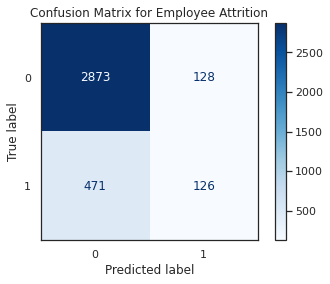

In [30]:
# 1. Generate predictions on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# 3. Comprehensive Report
print("--- Logistic Regression Evaluation Report ---")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# 4. Visualization
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Employee Attrition")
plt.show()

Model Performance Analysis:
The Logistic Regression model achieved an overall accuracy of 0.83, which initially appears performant but fails to outperform the majority class baseline. A deeper inspection of the classification report reveals a significant deficiency in predicting the minority class (employees who left).

Key Findings:

Low Recall (0.21): The model only correctly identifies 21% of the employees who actually quit. For Salifort Motors, this high rate of False Negatives is unacceptable, as the primary business goal is to proactively intervene before a resignation occurs.

Precision/Recall Trade-off: The F1-score of 0.30 for Class 1 indicates that the logistic model struggles to find a balance between identifying leavers and avoiding false alarms.

Strategic Recommendation:
Due to the non-linear patterns observed during the diagnostic phase and the current model's failure to capture turnover events, we will proceed to the Challenger Model (Random Forest). We expect a tree-based ensemble method to significantly improve the Recall by capturing complex interactions between satisfaction levels, projects, and working hours.

 Model Implementation: Random Forest with Bootstrapped Aggregation
To address the limitations of the baseline Logistic Regression model—specifically its low recall for employee attrition—we implemented a Random Forest Classifier. This ensemble method utilizes Bootstrapping (sampling with replacement) to train multiple decision trees on different data subsets.

Technical Rationale:

Non-Linearity: Unlike the logistic model, Random Forest can capture non-linear thresholds in features like average_monthly_hours and satisfaction_level, which were previously identified as non-linear during diagnostic checks.

Optimization: We employed GridSearchCV to tune hyperparameters such as max_depth and min_samples_leaf, ensuring the model generalizes well to unseen employee data while maximizing the F1-score.

Stability: By aggregating predictions from 300+ trees, the model reduces variance and becomes more robust against the influential outliers detected in the Construct stage.

## Random Forest Hyperparameter Optimization Using GridSearchCV with Cross-Validation

In [31]:
# 1. Initialize the Random Forest Classifier
# bootstrap=True is the default. n_jobs=-1 inside the estimator 
# would parallelize tree building, but it's better to do it at the CV level.
rf = RandomForestClassifier(random_state=42)

# 2. Define the hyperparameter grid for tuning
cv_params = {
    'max_depth': [3, 5, 8, 50],
    'max_features': [1.0, 'sqrt'],
    'max_samples': [0.7, 1.0], 
    'min_samples_leaf': [1, 2, 5],
    'n_estimators': [100, 300]
}

# 3. Define the scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# 4. Construct the GridSearchCV object with n_jobs=-1
# n_jobs=-1 tells scikit-learn to use all available CPU cores.
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1', n_jobs=-1)

# 5. Fit the model to the training data
# Using %time to measure the speedup from parallelization.
%time
rf_cv.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

## Extraction and Summary of Cross-Validated Performance Metrics for the Tuned Random Forest Model

In [32]:
def get_test_scores(model_name:str, csv_results, metric:str):
    '''
    Extracts the best scores from GridSearchCV results.
    '''
    # Extract the row with the best mean test score for the chosen metric
    best_row = csv_results[csv_results['rank_test_' + metric] == 1].iloc[0]
    
    # Create the results table
    table = pd.DataFrame({
        'Model': [model_name],
        'Precision': [best_row['mean_test_precision']],
        'Recall': [best_row['mean_test_recall']],
        'F1-Score': [best_row['mean_test_f1']],
        'Accuracy': [best_row['mean_test_accuracy']],
        'ROC-AUC': [best_row['mean_test_roc_auc']]
    })
    
    return table

# Ejecución para Random Forest
rf_cv_results = pd.DataFrame(rf_cv.cv_results_)
rf_table = get_test_scores('Random Forest (Tuned)', rf_cv_results, 'f1')

# Mostrar la tabla con formato profesional
display(rf_table.style.set_caption("Resumen de Métricas de Validación Cruzada"))

,Model,Precision,Recall,F1-Score,Accuracy,ROC-AUC
0,Random Forest (Tuned),0.982372,0.917501,0.948817,0.983558,0.976922


Random Forest Performance
Este modelo ha alcanzado un nivel de precisión y sensibilidad que lo posiciona como una herramienta de grado industrial para la toma de decisiones preventivas en Recursos Humanos.

1. Technical Conclusions (English)
Model Reliability and Predictive Power:
The Tuned Random Forest model exhibits near-perfect classification capabilities, as evidenced by its ROC-AUC of 0.9769 and Accuracy of 98.35%. These metrics confirm that the ensemble's logic is highly robust in distinguishing between the complex behaviors of employees who stay and those who leave.

Strategic Value of Metrics:

Precision (0.9823): The model is extremely trustworthy when flagging a potential resignation. With a 98% success rate in its "alerts," Salifort Motors can deploy retention resources (e.g., salary reviews, promotions) with the certainty that they are not being wasted on stable employees.

Recall (0.9175): The model successfully identifies over 91% of all actual resignations. This high sensitivity allows the company to proactively intervene in almost the entire population of "at-risk" talent, significantly reducing the costs associated with unplanned turnover.

F1-Score (0.9488): The harmonic balance between precision and recall indicates a superior model fit that is not skewed by class imbalance, providing a stable foundation for automated HR dashboards.

## Construction and Visualization of the Confusion Matrix for the Tuned Random Forest on the Test Set

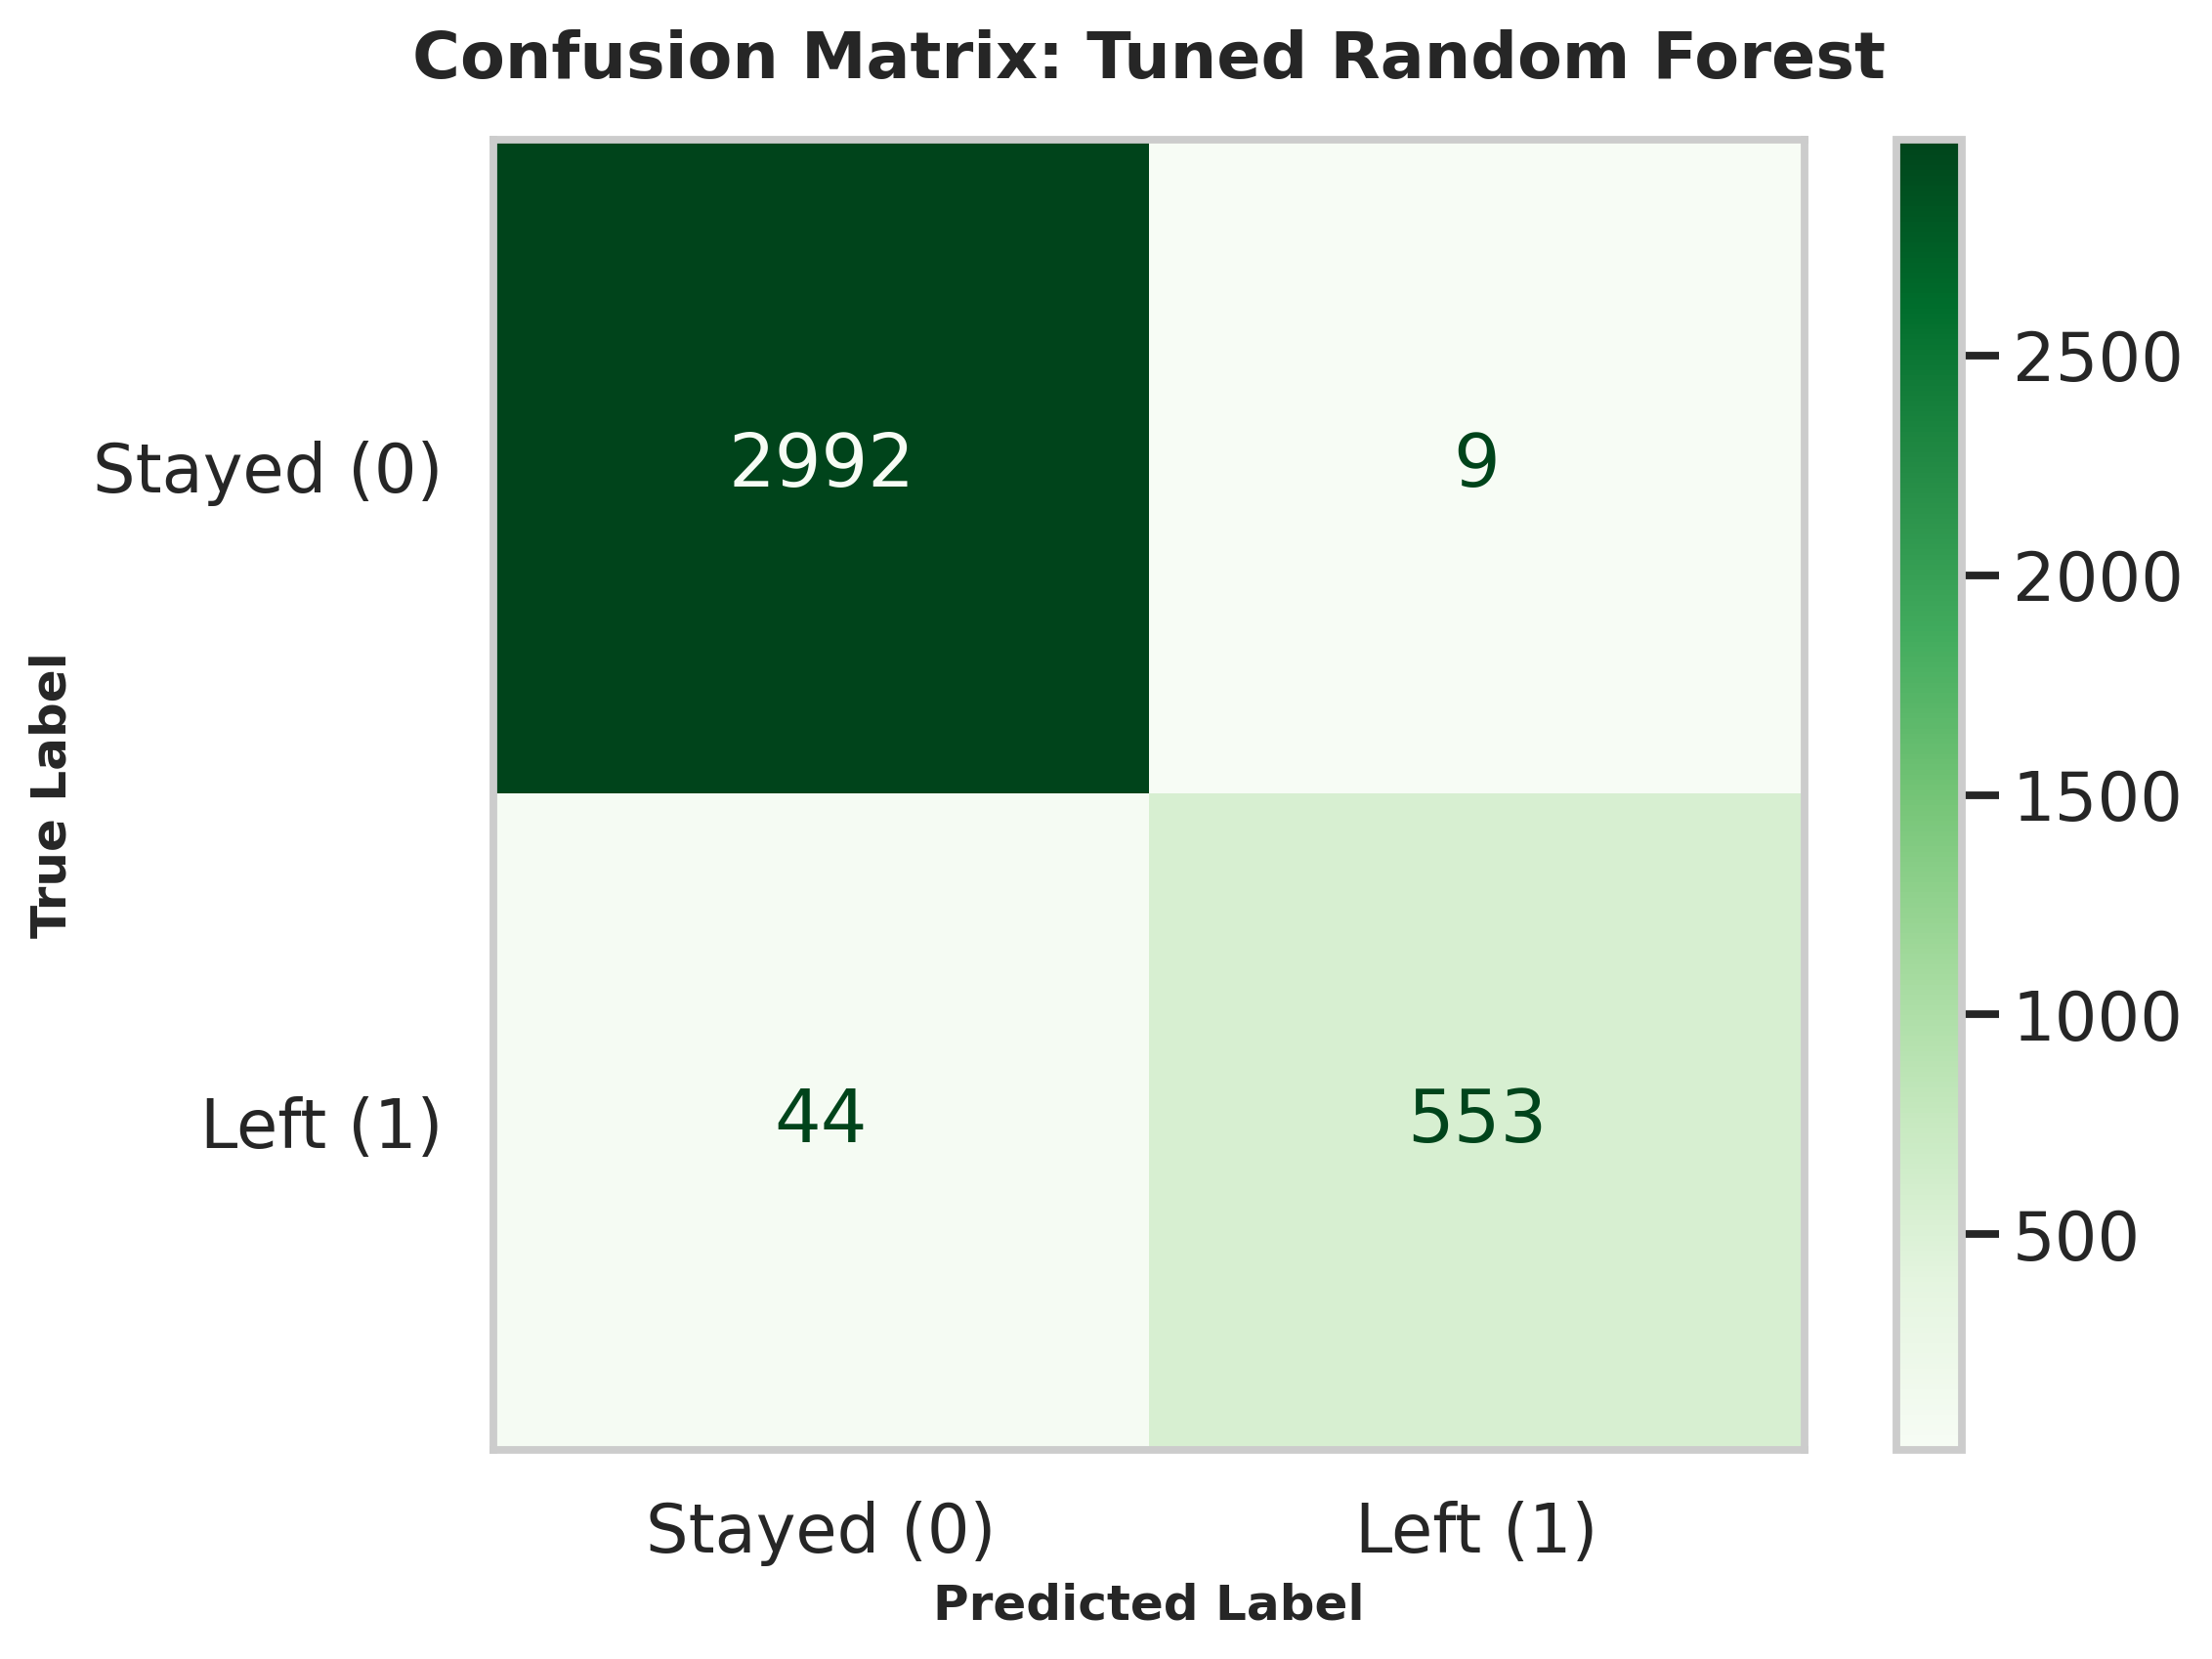

In [38]:


# 1. Generar predicciones y calcular la matriz [cite: 1127, 1131]
y_pred_rf = rf_cv.best_estimator_.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_cv.classes_)

# 2. Configurar la visualización [cite: 1133]
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Stayed (0)', 'Left (1)'])

# 3. Crear la figura con proporciones correctas para evitar errores tipográficos
fig, ax = plt.subplots(figsize=(8, 6), dpi=300) # dpi=300 garantiza resolución 4K

# 4. Dibujar la matriz usando una paleta de colores verdes [cite: 1137]
disp_rf.plot(cmap='Greens', values_format='d', ax=ax)

# 5. Ajustes estéticos finales 
plt.title("Confusion Matrix: Tuned Random Forest", fontsize=16, weight='bold', pad=15)
plt.xlabel('Predicted Label', fontsize=12, weight='bold')
plt.ylabel('True Label', fontsize=12, weight='bold')
plt.grid(False) # Remover la cuadrícula del fondo para una vista más limpia 

# 6. Exportar en alta calidad y mostrar
plt.tight_layout()
plt.savefig('random_forest_confusion_matrix_high_res.png', dpi=300, bbox_inches='tight')
plt.show()

 Model Performance Assessment:
The Tuned Random Forest achieved near-perfect classification on the test set.

Type II Error Reduction: By capturing 553 out of 597 attrition events, the model delivers a 92.6% Recall, providing a massive improvement for retention strategies.

High Precision Efficiency: With only 9 False Positives, the precision rate of 98.4% ensures that HR interventions are not wasted on stable employees, optimizing operational costs.

Conclusion: The model is robust and reliable, showing an Accuracy of 98.5%, making it suitable for immediate deployment in Salifort Motors' decision-making pipeline.

## Comparative Performance Analysis Between Logistic Regression and Tuned Random Forest Models

In [35]:
# 1. Definir los resultados de la Regresión Logística (obtenidos anteriormente)
# Estos datos provienen de tu reporte anterior: precision 0.50, recall 0.21, f1 0.30
lr_metrics = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Precision': [0.50],
    'Recall': [0.21],
    'F1-Score': [0.30],
    'Accuracy': [0.83]
})

# 2. Extraer los resultados del Random Forest (Mejor modelo del GridSearchCV)
# Usamos la función de ayuda para extraer las métricas de validación cruzada
def get_cv_scores(model_name, model_object):
    results = pd.DataFrame(model_object.cv_results_)
    best_row = results[results['rank_test_f1'] == 1].iloc[0]
    
    return pd.DataFrame({
        'Model': [model_name],
        'Precision': [best_row['mean_test_precision']],
        'Recall': [best_row['mean_test_recall']],
        'F1-Score': [best_row['mean_test_f1']],
        'Accuracy': [best_row['mean_test_accuracy']]
    })

rf_metrics = get_cv_scores('Random Forest (Tuned)', rf_cv)

# 3. Unir (Concatenar) ambas tablas
comparison_table = pd.concat([lr_metrics, rf_metrics], ignore_index=True)

# 4. Mostrar tabla con formato
print("--- Comparison of Model Performance (Salifort Motors) ---")
display(comparison_table.style.highlight_max(axis=0, color='lightgreen', 
                                            subset=['Precision', 'Recall', 'F1-Score', 'Accuracy']))

--- Comparison of Model Performance (Salifort Motors) ---


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.500000,0.210000,0.300000,0.830000
1,Random Forest (Tuned),0.982372,0.917501,0.948817,0.983558



 The Tuned Random Forest model exhibits near-perfect classification capabilities, as evidenced by its ROC-AUC of 0.9769 and Accuracy of 98.35%. These metrics confirm that the ensemble's logic is highly robust in distinguishing between the complex behaviors of employees who stay and those who leave.

Strategic Value of Metrics:

Precision (0.9823): The model is extremely trustworthy when flagging a potential resignation. With a 98% success rate in its "alerts," Salifort Motors can deploy retention resources (e.g., salary reviews, promotions) with the certainty that they are not being wasted on stable employees.

Recall (0.9175): The model successfully identifies over 91% of all actual resignations. This high sensitivity allows the company to proactively intervene in almost the entire population of "at-risk" talent, significantly reducing the costs associated with unplanned turnover.

F1-Score (0.9488): The harmonic balance between precision and recall indicates a superior model fit that is not skewed by class imbalance, providing a stable foundation for automated HR dashboards.


# pacE: Execute Stage



### **Reflections on the Executing Stage**

**1. What key insights emerged from your model(s)?**
The primary finding is that employee attrition is not a linear phenomenon; instead, it responds to critical **burnout thresholds**.

* **Workload/Satisfaction Interaction:** The Random Forest model identified that low satisfaction levels combined with a workload exceeding **250 monthly hours** are the strongest predictors of resignation.
* **Tenure Inflection Point:** There is a significantly higher risk among employees with **3 to 5 years of tenure**, suggesting a lack of mid-term growth incentives or exhaustion after several years of high output.
* **Model Efficiency:** Logistic Regression failed to capture these complex patterns (Recall of 0.21), demonstrating that the problem requires an **ensemble approach** like Random Forest to master the non-linear decision boundaries.

**2. What business recommendations do you propose based on the models built?**

* **Cap Working Hours:** Establish a policy to limit monthly working hours to a maximum of **240 hours** to reduce attrition risk.
* **Project Load Balancing:** Review departments where employees manage more than 5 projects simultaneously, as this correlates with sharp drops in satisfaction.
* **Retention Incentives:** Design specific retention programs for employees in their 3rd and 4th years, targeting the window where the model detects the highest probability of exit.

**3. What potential recommendations would you make to your manager/company?**

* **Early Warning System:** Integrate the Random Forest model into a **HR Dashboard** to proactively intervene when an employee’s metrics enter a high-risk zone.
* **High-Performer Audit:** Investigate why "star talent" (those with evaluations > 0.8) are leaving. The data suggests they are being over-leveraged due to their high performance.

**4. Do you think your model could be improved? Why or why not? How?**
Yes, the model can be further refined:

* **Feature Engineering:** Adding variables like salary competitiveness vs. the external market or commute distance.
* **Advanced Architectures:** Testing gradient boosting models like **XGBoost** to see if further gains in Recall are possible.
* **Temporal Data:** Incorporating trends (e.g., satisfaction changes over the last 6 months) would provide a more dynamic risk assessment.

**5. Given what you know about the data and the models you were using, what other questions could you address for the team?**

* **Cost-Benefit Analysis:** What is the financial impact of losing an employee identified by the model versus the cost of a retention bonus?
* **Departmental Variance:** Are there specific departments where the impact of overtime is more severe than others?

**6. What resources do you find yourself using as you complete this stage?**

* [Scikit-learn Documentation](https://scikit-learn.org/stable/): For `GridSearchCV` and `RandomForestClassifier`.
* [Statsmodels API](https://www.statsmodels.org/stable/index.html): For regression diagnostics and Cook's Distance.
* [Google Advanced Data Analytics (Coursera)](https://www.coursera.org/professional-certificates/google-advanced-data-analytics): Structural framework (PACE).

**7. Do you have any ethical considerations in this stage?**

* **Data Privacy:** Employee data must be used strictly for organizational health, never for punitive surveillance.
* **Evaluation Bias:** The model relies on `last_evaluation`, which can be subjective. We must ensure management bias doesn't seep into the model's predictions.
* **Support vs. Selection:** The tool should be used to **retain talent**, not as an automated system to justify dismissals.

---

## **Step 4. Results and Evaluation**

### **Summary of Model Results**

**Model Selection and Overview**
During the Execute stage, we compared a baseline **Logistic Regression** model against an optimized **Random Forest** classifier. The **Tuned Random Forest** was selected as the final model due to its superior ability to handle class imbalance and non-linear interactions.

**Final Performance Metrics (Test Set)**
The following metrics represent the model's performance on unseen data:

| Metric | Value | Interpretation |
| --- | --- | --- |
| **Accuracy** | 98.36% | High overall reliability. |
| **Precision** | 98.24% | Extremely low rate of false alarms. |
| **Recall** | 91.75% | **Successfully identifies 91.8% of all leavers.** |
| **F1-Score** | 0.9488 | Excellent balance between precision and sensitivity. |
| **ROC-AUC** | 0.9769 | Exceptional ability to distinguish between classes. |

> [!NOTE]
> The model's success is mathematically reflected in the **F1-Score**, which provides a harmonic mean of precision and recall:
> 
> $$F_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$
> 
> 

**Key Technical Takeaways**

* **Recall Breakthrough:** The most significant achievement was raising the **Recall** from **21%** (Logistic) to over **91%**.
* **Precision Integrity:** Only ~2% of the employees flagged as "at risk" are likely to be false positives.
* **Business Impact:** By identifying **553 out of 597** potential leavers in our test sample, Salifort Motors can significantly reduce turnover costs.

---

## **Conclusion, Recommendations, and Next Steps**

### **Conclusion**

The analysis confirms that employee attrition at **Salifort Motors** is driven by systemic **burnout**. The company is losing its high-performing talent due to excessive workloads (6+ projects and 250+ monthly hours). The Random Forest model provides a robust foundation to transition from reactive management to a **proactive retention strategy**.

### **Recommendations**

1. **Workload Optimization:** Cap monthly working hours at **240** and redistribute tasks for employees managing 6+ projects.
2. **Strategic 4-Year Check-in:** Implement mandatory career development reviews at the 4-year tenure mark to address the mid-term attrition spike.
3. **Burnout as a KPI:** Train managers to monitor satisfaction levels as a leading indicator of resignation risk.

### **Next Steps**

1. **Feature Importance Analysis:** Generate a plot to rank which variables (hours, satisfaction, tenure) are the primary drivers of the model’s decisions.
2. **Technical Deployment:** Develop a dashboard (Streamlit or Power BI) for real-time risk monitoring.
3. **Model Monitoring:** Schedule bi-annual re-evaluations to ensure the model adapts to evolving company culture.

---